<a href="https://colab.research.google.com/github/nonwiz0/shapeidentifier/blob/main/shape_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shape Identifier
Develop a neural network to recognize basic geometry shapes like triangles, rectangles, pentagons, hexagons base on user input.

## Testing library

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow_datasets as tfds
import os
import cv2

IMG_SIZE = 200
DATADIR = "/content/drive/MyDrive/AI_Dataset/Training_Dataset"
TRAINING_DATADIR = "/content/drive/MyDrive/AI_Dataset/Training_Dataset"
TESTING_DATADIR = "/content/drive/MyDrive/AI_Dataset/Testing_Dataset"

CATEGORIES = ["Circle", "Heptagon", "Hexagon", "Nonagon", "Octagon", "Pentagon", "Square", "Star", "Triangle"]
for category in CATEGORIES:
  path = os.path.join(TESTING_DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(200, 200)


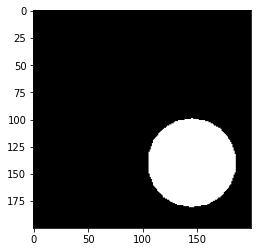

In [ ]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
print(new_array.shape)
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
# training_data, testing_data = [], []
training_data = np.load('/content/drive/MyDrive/AI_Dataset/training_data.npy')
testing_data = np.load("/content/drive/MyDrive/AI_Dataset/testing_data.npy")

def create_training_data():
  loop = 0
  img_size = 200
  for category in CATEGORIES:
    path = os.path.join(TRAINING_DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (img_size, img_size))
      training_data.append([new_array, class_num])
      print(f"Added {loop} by Training_data")
      loop += 1
    path = os.path.join(TESTING_DATADIR, category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (img_size, img_size))
      testing_data.append([new_array, class_num])
      print(f"Added {loop} by Testing_data")

# create_training_data()



In [ ]:
import random
random.shuffle(training_data)
random.shuffle(testing_data)
print("Everyday im shuffling...")

Everyday im shuffling...


In [ ]:
X_TRAIN, X_TEST = [], []
y_train, y_test = [], []

for features, label in training_data:
    X_TRAIN.append(features)
    y_train.append(label)
  

for features, label in testing_data:
  X_TEST.append(features)
  y_test.append(label)

X_TRAIN = np.array(X_TRAIN).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_TEST = np.array(X_TEST).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
def showFigure(arr, label):
  print("label:", label, "category", CATEGORIES[label])
  plt.figure()
  img =cv2.resize(arr, (IMG_SIZE, IMG_SIZE) )
  plt.imshow(img, cmap='gray')
  plt.show()



Hello 2 Hexagon


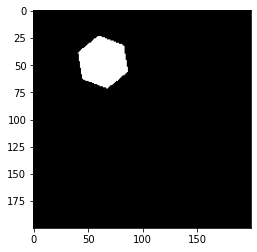

In [ ]:
print("Hello", y_train[400], CATEGORIES[y_train[400]])
# new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img =cv2.resize(X_TRAIN[30], (IMG_SIZE, IMG_SIZE) )
plt.imshow(img, cmap='gray')
plt.show()

label: 2 category Hexagon


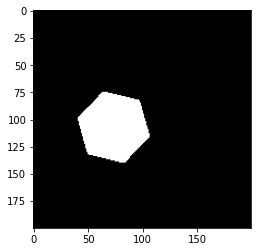

In [ ]:
index = 100
showFigure(X_TRAIN[index], y_train[index])


In [ ]:
# Saving all the major data set
# np.save("x_train.npy", X_TRAIN)
# np.save("y_train.npy", y_train)
# np.save("x_test.npy", X_TEST)
# np.save("y_test.npy", y_test)
# np.save("training_data.npy", training_data)
# np.save("testing_data.npy", testing_data)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
# Data Preprocessing
X_TRAIN = X_TRAIN / 255
X_TEST = X_TEST / 255

In [ ]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)),
    keras.layers.Dense(81, activation='relu'),
    keras.layers.Dense(len(CATEGORIES), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
model.fit(X_TRAIN, y_train, epochs=5)

Epoch 1/5
141/141 [==============================] - 5s 29ms/step - loss: 3.5933 - accuracy: 0.1069
Epoch 2/5
141/141 [==============================] - 6s 46ms/step - loss: 2.1973 - accuracy: 0.1138
Epoch 3/5
141/141 [==============================] - 8s 57ms/step - loss: 2.1971 - accuracy: 0.1153
Epoch 4/5
141/141 [==============================] - 9s 66ms/step - loss: 2.1971 - accuracy: 0.1153
Epoch 5/5
141/141 [==============================] - 5s 36ms/step - loss: 2.1970 - accuracy: 0.1111


In [ ]:
model.evaluate(X_TEST, y_test)
y_predicted = model.predict(X_TEST)
y_predicted[1]






29/29 [==============================] - 49s 2s/step - loss: 2.5368 - accuracy: 0.1933


array([0.15711522, 0.07098015, 0.09610913, 0.09351648, 0.10853575,
       0.14843705, 0.10718543, 0.05834623, 0.15977448], dtype=float32)

# Reference
- [Loading your own custom dataset](https://www.youtube.com/watch?v=j-3vuBynnOE)
- [Saving and Load](https://colab.research.google.com/github/geekmj/python-tutorials/blob/master/numpy-basics/save-array-to-file.ipynb#scrollTo=rw-4iKeOgkMm)
